In [381]:
from numpy import *
from numpy.random import *
import pandas

df1 = pandas.read_csv('../data/FitShards_red.csv')


In [436]:
from numpy import random

v_err = zeros(shape=(df1.shape[0],3))
sig_err = zeros(shape=(df1.shape[0],3))

for i in range(df1.shape[0]):
    name = df1.group_id[i]
    
    if name.endswith('a') or name.endswith('b'):
        name = name[0:-1]

    Cand = df.loc[df['group_id'] == name]
    Cand = Cand.reset_index()
    pop = int(df1.population[i])
    
    vx = Cand.GalRVel
    vy = Cand.GalTVel
    vz = Cand.GalzVel
    
    vdist = sqrt((Cand.GalRVel-df1.vx[i])**2.0+(Cand.GalTVel-df1.vy[i])**2.0+(Cand.GalzVel-df1.vz[i])**2.0)
    isort = argsort(vdist).values
    vx = Cand.GalRVel[isort]
    vy = Cand.GalTVel[isort]
    vz = Cand.GalzVel[isort]
    vx = vx[0:pop]
    vy = vy[0:pop]
    vz = vz[0:pop]
    
    #typical_error = 5.18*Cand.helio_dist[0:pop]/1000
    typical_error = 6.0*Cand.helio_dist[0:pop]/1000
    std_typical_error = 0.7*typical_error
    vx_errs = random.normal(loc=typical_error,scale=std_typical_error)
    vy_errs = random.normal(loc=typical_error,scale=std_typical_error)
    vz_errs = random.normal(loc=typical_error,scale=std_typical_error)
    
    vx_err = sum(vx_errs)/pop
    vy_err = sum(vy_errs)/pop
    vz_err = sum(vz_errs)/pop
    sigx_err = sum(vx_errs*(abs(vx-mean(vx))/std(vx)))/pop
    sigy_err = sum(vy_errs*(abs(vy-mean(vy))/std(vy)))/pop
    sigz_err = sum(vz_errs*(abs(vz-mean(vz))/std(vz)))/pop

    v_err[i,:] = array([vx_err,vy_err,vz_err])
    sig_err[i,:] = array([sigx_err,sigy_err,sigz_err])
    print(name,pop,v_err[i,:],sig_err[i,:])
    

S1 32 [24.08451821 20.70153012 20.77037263] [22.97969472 18.7639383  21.71683276]
S2 12 [22.88752408 16.83118299 17.7834437 ] [20.11486846 14.27556033 22.31402599]
S2 59 [19.35884471 18.88549926 19.23238837] [18.13998477 12.66288948 15.24654799]
Rg2 13 [37.98073797 43.51441165 32.28759965] [30.29172209 40.32186473 24.53972229]
Rg5 14 [21.17519307 16.35587394 17.52064397] [18.34342965 17.2794183  13.05939164]
Rg5 15 [15.08853231 17.31413185 19.52841915] [11.19666236 13.45725965 15.04227178]
Rg6 17 [27.1349906  18.22128259 31.35689797] [33.96564847 15.28076123 17.65657048]
Rg6 12 [24.54532497 31.61947848 27.03034406] [16.69729938 23.95921429 16.78066619]
Rg7 5 [29.15849438 50.39665753 45.35645968] [28.92671619 48.46423042 27.28585981]
Rg7 9 [38.9979411  26.85600551 43.84973502] [24.86945803  7.41929948 34.84733633]
Cand8 31 [32.06536757 25.16478394 28.69256072] [27.90476612 20.75580994 27.7251967 ]
Cand8 18 [26.93215139 28.08695836 19.3563363 ] [21.0820848  29.66897803 11.20896695]
Cand9

In [437]:
df1['vx_err'] = v_err[:,0]
df1['vy_err'] = v_err[:,1]
df1['vz_err'] = v_err[:,2]
df1['sigx_err'] = sig_err[:,0]
df1['sigy_err'] = sig_err[:,1]
df1['sigz_err'] = sig_err[:,2]

In [438]:
df1.to_csv('../data/FitShards_red.csv')

In [164]:
from numpy import random
i = 0
name = df1.group_id[i]

if name.endswith('a') or name.endswith('b'):
    name = name[0:-1]

Cand = df.loc[df['group_id'] == name]
mean_error = 3.18*Cand.helio_dist/1000

typical_error = 3.18*Cand.helio_dist/1000
vx_err = random.normal(loc=typical_error,scale=0.7*typical_error)
vy_err = random.normal(loc=typical_error,scale=0.7*typical_error)
vz_err = random.normal(loc=typical_error,scale=0.7*typical_error)
v_err = array([(mean(vx_err),mean(vy_err),mean(vz_err))])
sig_err = array([(std(vx_err),std(vy_err),std(vz_err))])
print(name,pop,v_err,sig_err)

In [167]:
v_err = array([(mean(vx_err),mean(vy_err),mean(vz_err))])
sig_err = array([(std(vx_err),std(vy_err),std(vz_err))])
print(name,pop,v_err,sig_err)

S1 14 [[10.99606415 13.38924092 11.34684222]] [[11.55526383 14.36543389 15.13492137]]


In [99]:
# Load all stars
df = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df.group_id.unique()
num_cands = size(names)

In [166]:
if namei.endswith('a') or namei.endswith('b'):
    name = name[0:-1]

Cand = df.loc[df['group_id'] == name_i]
mean_err = mean(3.18*Cand.helio_dist/1000)
std_err = 2*std((3.18*Cand.helio_dist/1000))

vx_err = sqrt(sum((std_err*randn(pop)+mean_err)**2.0)/pop)
vy_err = sqrt(sum((std_err*randn(pop)+mean_err)**2.0)/pop)
vz_err = sqrt(sum((std_err*randn(pop)+mean_err)**2.0)/pop)
v_err = array([vx_err,vy_err,vz_err])
print(name,pop,v_err,sig_err)

NameError: name 'namei' is not defined

In [182]:
df2 =  pandas.read_csv('../data/SDSS_Gaia_GDR2_pm_S1S2_cleaned.csv')

d = df2.helio_dist/1000
pmra = df2.pmra
pmdec = df2.pmdec
vra = pmra*4.74*d
vdec = pmdec*4.74*d
rv = df2.hrv

vra_err = pmra_error*4.74*d

print(vra[i],vdec[i],rv[i])

-206.299621271318 -148.76623430373584 -108.1591


In [183]:
df2.columns

Index(['group_id', 'source_id', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'bp_rp', 'l', 'b', 'hrv', 'hrv_e', 'logg', 'logg_e',
       'teff', 'teff_e', 'feh', 'feh_e', 'helio_dist', 'Galdist', 'GalRecX',
       'GalRecY', 'GalRecZ', 'GalU', 'GalV', 'GalW', 'GalRVel', 'GalTVel',
       'GalzVel', 'GalSphrVel', 'GalSphphiVel', 'GalSphithetaVel'],
      dtype='object')

In [356]:
from astropy.coordinates import SkyCoord
import astropy.units as u


df2 =  Table.read('../data/SDSS_Gaia_GDR2_pm_S1S2_cleaned.csv')

nstars = shape(df2)[0]

verr = zeros(shape=(nstars,3))
vmean = zeros(shape=(nstars,3))

for i in range(0,nstars):

    ngen = 500000

    ra = u.deg*df2['ra'][i]*ones(shape=ngen)
    dec = u.deg*df2['dec'][i]*ones(shape=ngen)
    dist = u.pc*(df2['helio_dist'][i]+0.1*df2['helio_dist'][i]*randn(ngen))
    pmra = u.mas/u.yr*(df2['pmra'][i]+df2['pmra_error'][i]*randn(ngen))
    pmdec = u.mas/u.yr*(df2['pmdec'][i]+df2['pmdec_error'][i]*randn(ngen))
    rv = u.km/u.s*((df2['hrv'][i]+df2['hrv_e'][i]*randn(ngen)))


    c = SkyCoord(ra=ra,dec=dec,pm_ra_cosdec=pmra,pm_dec=pmdec,distance=dist,radial_velocity=rv)

    # Transform to galactocentric
    v0 = 238.0
    v_pec = SHM.PeculiarVelocity
    v_sun = coord.CartesianDifferential((v_pec + v0*array([0,1,0]))*u.km/u.s)
    gc_frame = coord.Galactocentric(galcen_distance=8.1*u.kpc,
                                    galcen_v_sun=v_sun,
                                    z_sun=25.0*u.pc)
    galcen = c.transform_to(gc_frame)

    # Rectangular coords
    v_x = galcen.v_x
    v_y = galcen.v_y
    v_z = galcen.v_z
    # Get cylindrical coords.
    galcen.representation_type = 'cylindrical'
    vR = galcen.d_rho.to(u.km/u.s).value
    vT = -1*galcen.d_phi.to(u.mas/u.yr).value*4.74047*galcen.rho.to(u.kpc).value
    vz = galcen.d_z.to(u.km/u.s).value
    
    verr[i,:] = array([std(vR),std(vT),std(vz)])
    vmean[i,:] = array([mean(vR),mean(vT),mean(vz)])


(array([10., 10., 16., 15.,  8.,  6.,  9.,  4.,  2.,  2.]),
 array([ 2.45716365,  5.37416942,  8.29117519, 11.20818095, 14.12518672,
        17.04219249, 19.95919826, 22.87620403, 25.79320979, 28.71021556,
        31.62722133]),
 <a list of 10 Patch objects>)

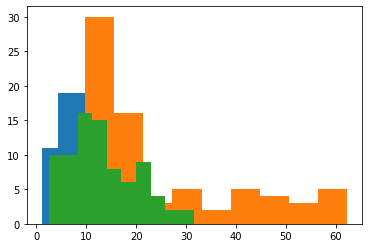

In [425]:
plt.hist(verr[:,0])
plt.hist(verr[:,1])
plt.hist(verr[:,2])

In [373]:
print(mean(verr[:,0]),std(verr[:,0]))
print(mean(verr[:,1]),std(verr[:,1]))
print(mean(verr[:,2]),std(verr[:,2]))

10.817549515303007 6.229111213418077
22.926442992193863 15.745352945744253
13.18922694640701 6.806987256512271


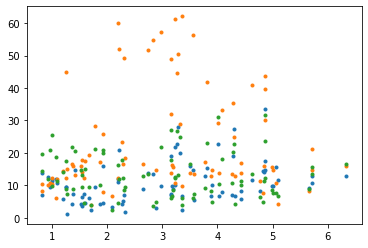

In [428]:
plt.plot(df2['helio_dist']/1000,verr[:,0],'.')
plt.plot(df2['helio_dist']/1000,verr[:,1],'.')
plt.plot(df2['helio_dist']/1000,verr[:,2],'.')

# dvals = linspace(0,30,100)
# plt.plot(verr_vals,verr_vals*)

In [215]:
# Get cylindrical coords.
galcen.representation_type = 'cylindrical'
vR = galcen.d_rho.to(u.km/u.s).value
vT = -1*galcen.d_phi.to(u.mas/u.yr).value*4.74047*galcen.rho.to(u.kpc).value
vz = galcen.d_z.to(u.km/u.s).value


In [291]:
import os
from astropy.table import join
import glob
df2 =  Table.read('../data/SDSS_Gaia_GDR2_pm_S1S2_cleaned.csv')
df2['dist'] = 0.0
df2['dist_error'] = 0.0
    
SH_dir = os.path.expanduser("~/Data/StarHorse/")
for dirc in glob.glob(SH_dir+'*.fits'):
    SH = Table.read(dirc)
    
    tab = join(df2,SH,keys='source_id')
    if shape(tab)[0]>0:
        for i in range(0,shape(tab)[0]):
            mask = df2['source_id']==tab['source_id'][i]
            df2['dist'][mask] = tab['dist50'][i]
            df2['dist_error'][mask] = 0.5*((tab['dist50'][i]-tab['dist16'][i])+(tab['dist84'][i]-tab['dist16'][i]))
    print(dirc)
    print(tab)

/Users/ciaranohare/Data/StarHorse/part14.fits
group_id      source_id              ra         ...   RGal          ruwe       
-------- ------------------- ------------------ ... -------- ------------------
      S1 1475481696090722944 202.36041768252684 ... 8.258289 1.0709478990566048
      S2 3927214676946595968  190.8429561276181 ... 7.844441 1.0246655075187867
/Users/ciaranohare/Data/StarHorse/part02.fits
group_id      source_id              ra         ...   RGal          ruwe       
-------- ------------------- ------------------ ... -------- ------------------
      S1 1659763693196474624 214.15566734228747 ... 8.470605 0.9937184199261878
      S1 3891169559051699328  180.1827343051461 ... 8.306817 1.0017023414097626
/Users/ciaranohare/Data/StarHorse/part03.fits
group_id      source_id              ra         ...   RGal          ruwe       
-------- ------------------- ------------------ ... -------- ------------------
      S2 1465018949599024000 193.32048037965268 ... 8.251668 1

In [303]:
df2.write('../data/SDSS_Gaia_GDR2_pm_S1S2_cleaned.csv',overwrite=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(array([4., 2., 2., 2., 3., 3., 5., 3., 0., 0., 0., 0., 0., 7., 2., 4., 2.,
        3., 1., 1.]),
 array([0.09253199, 0.11522953, 0.13792707, 0.16062462, 0.18332216,
        0.2060197 , 0.22871724, 0.25141478, 0.27411232, 0.29680986,
        0.3195074 , 0.34220495, 0.36490249, 0.38760003, 0.41029757,
        0.43299511, 0.45569265, 0.47839019, 0.50108773, 0.52378527,
        0.54648282]),
 <a list of 20 Patch objects>)

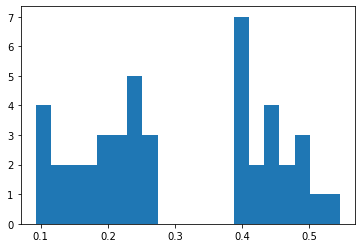

In [298]:
import matplotlib.pyplot as plt
plt.hist(df2['dist_error']/df2['dist'],20)

In [301]:
df2['dist'][mask] = df2['helio_dist'][mask]/1000.0
df2['dist_error'][mask] = 0.3*df2['helio_dist'][mask]/1000.0

In [333]:
df2['dist']

3.1996347904205322
4.610922336578369
4.63032350393
1.45100736618042
5.504973888397217
3.16446858861
3.16103068812
5.578365325927734
4.3110957030099994
5.079044818878174
3.22848490825


In [334]:
df2['helio_dist']/1000

3.31676511355
2.2066749327900004
4.63032350393
1.26945080301
4.08603677374
3.16446858861
3.16103068812
4.8699710422099995
4.3110957030099994
3.27176110004
3.22848490825
